## Adhoc Statistical Analysis - Vehicle data

### This is a quick statistical work through in preparing data for a **Regression Analysis**.
### For the purpose of this tutorial assume the relevant **Data Cleaning Process** has been applied.

### **1. Importing libraries and loading data.**

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
auto = pd.read_csv('Auto.csv', index_col= 'name')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [55]:
auto.shape

(392, 8)

### This dataset contains **8 features/predictors** for **392 vehicles**

### **2. Statitistcal Analysis - Measures of central tendency and dispersion (Data distribution)**

In [56]:
# Range
print('mpg range:', auto['mpg'].max() - auto['mpg'].min())
print('cylinders range:', auto['cylinders'].max() - auto['cylinders'].min())
print('displacement range:', auto['displacement'].max() - auto['displacement'].min())
print('horsepower range:', auto['horsepower'].max() - auto['horsepower'].min())
print('weight range:', auto['weight'].max() - auto['weight'].min())
print('acceleration range:', auto['acceleration'].max() - auto['acceleration'].min())
print('year range:', auto['year'].max() - auto['year'].min())
print('origin range:', auto['origin'].max() - auto['origin'].min())

mpg range: 37.6
cylinders range: 5
displacement range: 387.0
horsepower range: 184
weight range: 3527
acceleration range: 16.8
year range: 12
origin range: 2


### The **range** tells us how spread the data is by calculating the distance between the highest and lowest entry - e.g The **difference between** the **lowest** vehicle weight and the **highest** vehicle weight is 3527.

In [57]:
# Mean
print('mpg mean:', auto['mpg'].mean())
print('cylinders mean:', auto['cylinders'].mean())
print('displacement mean:', auto['displacement'].mean())
print('horsepower mean:', auto['horsepower'].mean())
print('weight mean:', auto['weight'].mean())
print('acceleration mean:', auto['acceleration'].mean())
print('year mean:', auto['year'].mean())
print('origin mean:', auto['origin'].mean())

mpg mean: 23.445918367346938
cylinders mean: 5.471938775510204
displacement mean: 194.41198979591837
horsepower mean: 104.46938775510205
weight mean: 2977.5841836734694
acceleration mean: 15.541326530612244
year mean: 75.9795918367347
origin mean: 1.5765306122448979


### The **mean** calculates the **averages** in the dataset - e.g. The average gas mileage (mpg) is 24.45.

In [58]:
# Standard deviation
print('mpg standard deviation:', auto['mpg'].std())
print('cylinders standard deviation:', auto['cylinders'].std())
print('displacement standard deviation:', auto['displacement'].std())
print('horsepower standard deviation:', auto['horsepower'].std())
print('weight standard deviation:', auto['weight'].std())
print('acceleration standard deviation:', auto['acceleration'].std())
print('year standard deviation:', auto['year'].std())
print('origin standard deviation:', auto['origin'].std())

mpg standard deviation: 7.805007486571799
cylinders standard deviation: 1.7057832474527843
displacement standard deviation: 104.64400390890465
horsepower standard deviation: 38.49115993282855
weight standard deviation: 849.4025600429494
acceleration standard deviation: 2.7588641191880816
year standard deviation: 3.6837365435778318
origin standard deviation: 0.805518183418305


### The **standard deviation (std)** is a **measure** of how data is **spread from the mean** - e.g. A high std indicates that data is highly spread and low std indicates that data is clustered close to the mean. We can conclude that the acceleration of vehicles are closely centred around the mean.

### **3. Correlations/Relationships**

### Determining relationships between the data is a crucial step in a regression analysis. This helps to select the most relevant features in predicting our target.

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

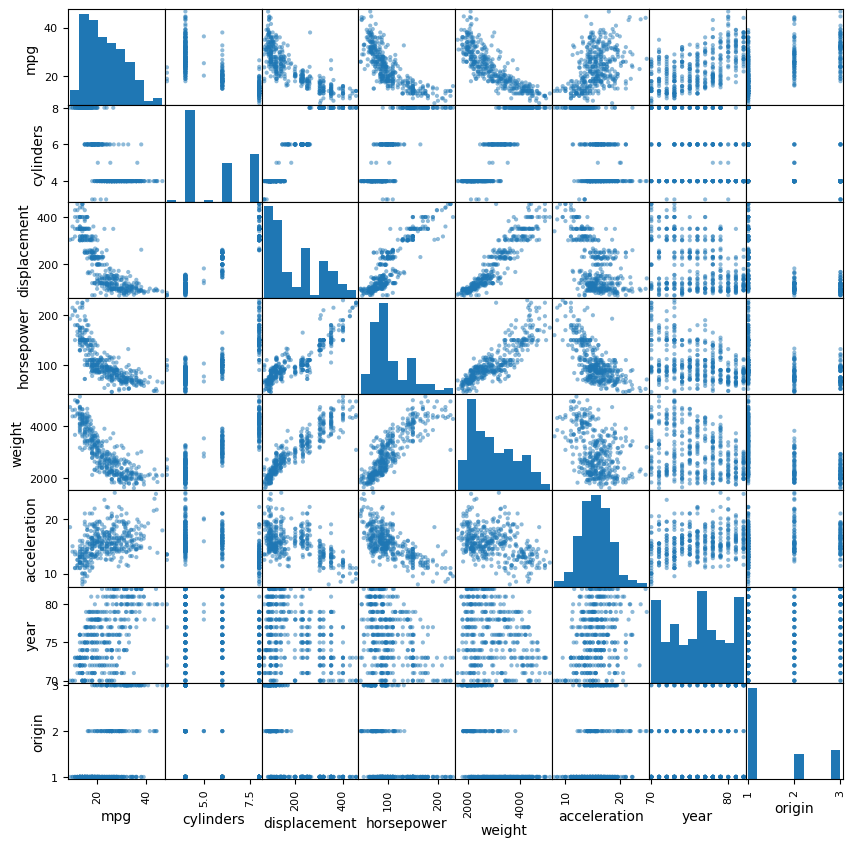

In [62]:
pd.plotting.scatter_matrix(auto, figsize=(10,10))

### Using a scatterplot, we can easily visualize correlations in the dataset e.g. There is a **negative correlation** between **gas mileage (mpg)** and the **weight** of a vehicle and a **positive correlation** between **weight** and **horsepower**. This implies that the heavier a vehicle, the higher its horsepower and the lower its mpg.

### In order to predict mpg of a vehicle based on other features, I have created a correlation matrix using pearson's correlation coefficient to further prove an existing relationship with other features.

In [63]:
corr_matrix = auto.corr()
corr = corr_matrix['mpg']
corr.sort_values(ascending=False)

mpg             1.000000
year            0.580541
origin          0.565209
acceleration    0.423329
cylinders      -0.777618
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: mpg, dtype: float64

### Based on the results there is a strong negative correlation between our target (mpg) and some predictors, namely weight, displacement, horsepower and number of cylinders. Despite mpg having positive correlations with the year, origin and acceleration features, the relationship is not strong. 

### This means our model to predict mpg will contain the following features:
### * Weight
### * Displacement
### * Horsepower
### * cylinders

In [64]:
mpg_predict = auto[['mpg','weight', 'displacement', 'horsepower', 'cylinders']]
mpg_predict.head()

,mpg,weight,displacement,horsepower,cylinders
name,,,,,
chevrolet chevelle malibu,18.0,3504,307.0,130,8
buick skylark 320,15.0,3693,350.0,165,8
plymouth satellite,18.0,3436,318.0,150,8
amc rebel sst,16.0,3433,304.0,150,8
ford torino,17.0,3449,302.0,140,8
